In [1]:
import sys
import os
import pandas as pd
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series


training_dir = os.path.join(os.path.dirname("training/"), '')
sys.path.append(training_dir)
print(training_dir)

training/


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Inventory_Level'>)

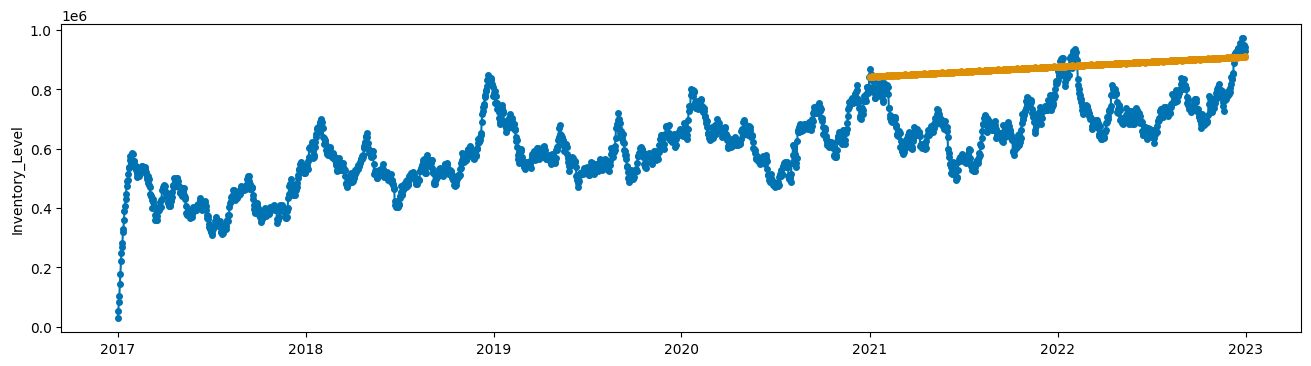

In [5]:
data = pd.read_csv("src/csv/train_inventory(in).csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.index = pd.DatetimeIndex(data.index).to_period('D')
ts = data['Inventory_Level']

# Split the data into training and testing sets
y_train, y_test = temporal_train_test_split(ts, test_size=730)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
mape = mean_absolute_percentage_error(y_test, y_pred)
plot_series(data, y_pred)